# Перетворення Лагера

In [22]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interactive, interactive_output, fixed, IntSlider, FloatSlider
import ipywidgets as widgets

## Многочлени Лагера (1)

### Завдання №1
Побудувати функцiю для обчислення значення функцiї Лаґерра за
формулою (1.2) для довiльних t i n, а параметри задавати за замовчуванням β = 2, σ = 4.
### Теоритичні відомості до завдання 1
Функції Лагерра задають формулою

$$
l_{n}(t):=\sqrt{\sigma} L_{n}(\sigma t) e^{-\frac{\beta}{2} t}, t \in \mathbb{R}_{+}, n \in \mathbb{N}_{0} \quad(1.1)
$$

де

$L_{n}-$ поліноми Лаґерра,

$0 \leq \beta \leq \sigma-$ параметри, дійсні числа.

Для обчислень функцій Лагерра використовують рекурентну формулу

$$
\begin{array}{r}
l_{n}(t)=\frac{2 n-1-\sigma t}{n} l_{n-1}(t)-\frac{n-1}{n} l_{n-2}(t), \quad n \geq 2, \quad (1.2)\\ 
l_{0}(t)=\sqrt{\sigma} e^{-\frac{\beta}{2} t}, \quad l_{1}(t)=\sqrt{\sigma}(1-\sigma t) e^{-\frac{\beta}{2} t} . 
\end{array}
$$
Нижче наведений код побудованої рекурентної функції для обчислення значення функцiї Лаґерра за
формулою (1.2) для довiльних t i n, а параметри задані за замовчуванням β = 2, σ = 4.

In [23]:
def laguerre(t, n, beta=2, sigma=4):
    
    #Перевірка вхідних даних
    if n < 0:
        raise ValueError('Value "n" must be positive')
        
    if beta < 0:
        raise ValueError('Value "beta" must be positive')

    if sigma < beta:
        raise ValueError('Value "sigma" must be greater than beta')

    
    #Обчислення значення функції Лаґерра при n = 0 та n = 1
    l_0 = np.sqrt(sigma) * (np.exp(-beta * t / 2))
    l_1 = np.sqrt(sigma) * (1 - sigma * t) * (np.exp(-beta * t / 2))

    if n == 0:
        return l_0
    if n == 1:
        return l_1
    #Обчислення значення функції Лаґерра при n>=2
    if n >= 2:
        l_next = (2 * 2 - 1 - t * sigma) / 2 * l_1 - (2 - 1) / 2 * l_0
        for j in range(3, n+1):
            l_0 = l_1
            l_1 = l_next
            l_next = (2 * j - 1 - t * sigma) / j * l_1 - (j - 1) / j * l_0
        return l_next

Тестуємо нашу функцію при t = 7, n = 5, β = 2, σ = 4

## Табуляція многочленів Лагера (2)

### Завдання №2
Побудувати функцію для табулювання при заданих $n, \beta, \sigma$ функції Лагерра на відрізку $[0, T]$ із заданим $T \in \mathbb{R}_{+}$.

Реалізація функції наведена в комірці нижче

In [24]:
def tabulate_laguerre(T, t_step = 0.01, n=2, beta=2, sigma=4):
    
    #Перевірка вхідних даних
    if t_step < 0:
        raise ValueError('Value "T step" must be positive')
    if n < 0:
        raise ValueError('Value "n" must be positive')
        
    if beta < 0:
        raise ValueError('Value "beta" must be positive')

    if sigma < beta:
        raise ValueError('Value "sigma" must be greater than beta')
        
    t = np.arange(0, T, t_step)
    return t, laguerre(t, n, beta, sigma)

Нижче реалізоване вивидення табулювання у вигляді графіка та таблиці. Тестуємо нашу функцію при $T=7$

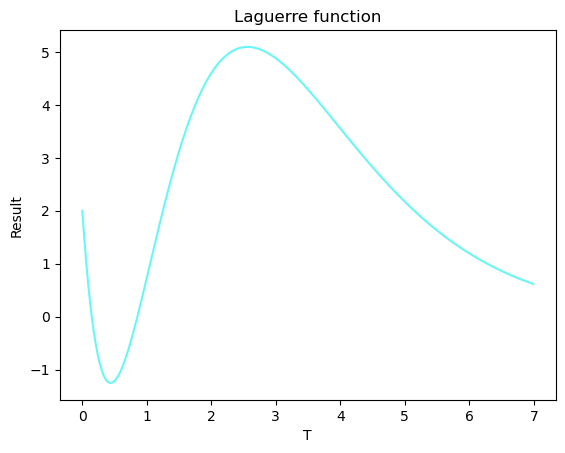

,t,L
0,0.00,2.000000
1,0.01,1.823276
2,0.02,1.653007
3,0.03,1.489052
4,0.04,1.331270
...,...,...
695,6.95,0.636189
696,6.96,0.631819
697,6.97,0.627476
698,6.98,0.623160


In [25]:
t, data = tabulate_laguerre(7)
plt.plot(t, data, color = "#68f7f5")
plt.title("Laguerre function")
plt.xlabel("T")
plt.ylabel("Result")
plt.savefig("lag_graph_0")
plt.show()
df = pd.DataFrame({"t": t, f"L": data})
df

## Обчислювальний експеримент (3)

### Завдання №3
Провести обчислювальний експеримент: для $N=20$ на основі графіків з п. 2 знайти точку $T>0$, щоб $\left|l_{n}(T)\right|<\varepsilon=10^{-3}$ для усіх $n \in[0, N]$. Побудувати табличку для $\left|l_{n}(T)\right|$ для усіх $n \in[0, N]$.

Реалізація експеременту наведена в комірці нижче.
В експеременті за допомогою циклу for ми знаходимо таку точку $T>0$, щоб $\left|l_{n}(T)\right|<\varepsilon=10^{-3}$ для усіх $n \in[0, N]$. Функція повертає точку $T$ та DataFrame з $\left|l_{n}(T)\right|$ для усіх $n \in[0, N]$.

In [26]:
def laguerre_experiment(T, beta, sigma, epsilon=0.001, N=20):
    
    #Перевірка вхідних даних
    if beta < 0:
        raise ValueError('Value "beta" must be positive')

    if sigma < beta:
        raise ValueError('Value "sigma" must be greater than beta')
    
    if epsilon < 0:
        raise ValueError('Value "epsilon" must be positive')
        
    if N < 0:
        raise ValueError('Value "N" must be positive')
    
    t = np.linspace(0, T, 1000)
    n = range(0, N+1)
    result = None
    for i in t:
        flag = True
        for j in n:
            if abs(laguerre(i, j, beta, sigma)) > epsilon:
                flag = False
                break
        if flag and result is None:
            result = i


    cols = {"t" : t}
    for j in n:
        cols[f"n={j}"] = laguerre(t, j, beta, sigma)

    df = pd.DataFrame(cols)

    return result, df.round(5)

Тестуємо нашу функцію при $T = 100,  \beta = 2, \sigma = 4$

In [27]:
T, df = laguerre_experiment(100, 2, 4)

Виводимо наше шукане $\left|l_{n}(T)\right|<\varepsilon=10^{-3}$ для усіх $n \in[0, N]$ та таблицю $\left|l_{n}(T)\right|$ для усіх $n \in[0, N]$.

In [28]:
T

79.07907907907908

In [29]:
df

,t,n=0,n=1,n=2,n=3,n=4,n=5,n=6,n=7,n=8,...,n=11,n=12,n=13,n=14,n=15,n=16,n=17,n=18,n=19,n=20
0,0.0000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,...,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000
1,0.1001,1.80949,1.08497,0.50550,0.05172,-0.29380,-0.54668,-0.72094,-0.82906,-0.88217,...,-0.80442,-0.72510,-0.62955,-0.52282,-0.40925,-0.29253,-0.17579,-0.06163,0.04782,0.15085
2,0.2002,1.63713,0.32612,-0.45997,-0.86125,-0.98978,-0.93409,-0.76300,-0.52907,-0.27143,...,0.40417,0.55421,0.65857,0.71780,0.73477,0.71390,0.66063,0.58092,0.48093,0.36668
3,0.3003,1.48119,-0.29802,-1.00863,-1.07852,-0.80705,-0.39600,0.02583,0.38297,0.63795,...,0.75506,0.62619,0.44937,0.24662,0.03764,-0.16110,-0.33677,-0.48021,-0.58574,-0.65081
4,0.4004,1.34010,-0.80621,-1.23375,-0.86012,-0.23551,0.33962,0.72824,0.89472,0.86127,...,0.09748,-0.19735,-0.44519,-0.62440,-0.72499,-0.74672,-0.69683,-0.58770,-0.43478,-0.25469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99.5996,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,...,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000
996,99.6997,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,...,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000
997,99.7998,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,...,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000
998,99.8999,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,...,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000


## Обчислення значень інтегралів (4)

### Завдання №4
Побудувати функцію для обчислення значень інтегралів (1.3) наближено за формулою

$$
f_{k}=\int_{0}^{T} f(t) l_{k}(t) e^{-\alpha t} d t, \quad k \in[0, N]
$$

використовуючи метод прямокутників із заданою точністю $\varepsilon>0$.

### Теоритичні відомості до завдання 4
Розглянемо простір Лебега $L_{\alpha}^{2}\left(\mathbb{R}_{+}\right)$, елементами якого є функції $f: \mathbb{R}_{+} \rightarrow \mathbb{R}$, що задовольняють умову

$$
\int_{\mathbb{R}_{+}}|v(t)|^{2} e^{-\alpha t} d t<\infty
$$

де $\alpha>0$ - стала, яка пов'язана з параметрами $\sigma$ і $\beta$ формулою $\sigma=\alpha+\beta$. Також будемо використовувати простір послідовностей

$$
l^{2}:=\left\{v:=\left.\left(v_{0}, v_{1}, \ldots, v_{j}, \ldots\right)^{\top} \in \mathbb{R}^{\infty}\left|\sum_{j=0}^{\infty}\right| v_{j}\right|^{2}<\infty\right\}
$$

Під ПЛ будемо розуміти відображення $\mathcal{L}: L_{\alpha}^{2}\left(\mathbb{R}_{+}\right) \rightarrow l^{2}$, яке довільній функції $f \in L_{\alpha}^{2}\left(\mathbb{R}_{+}\right)$ставить у відповідність послідовність $\mathbf{f}:=\left(f_{0}, f_{1}, \ldots, f_{k}, \ldots\right)^{\top}$ $\in l^{2}$ за формулою

$$
f_{k}:=(\mathcal{L} f)_{k}:=\int_{\mathbb{R}_{+}} f(t) l_{k}(t) e^{-\alpha t} d t, \quad k \in \mathbb{N}_{0} \quad (1.3)
$$

Спершу реалізована функція quad для обчислення наближеного значення інтегралу методом прямокутників 

In [30]:
def quad(f, a, b, N=10000):
    
    x = np.linspace(a, b, N)
    s = sum([f(i) for i in x])
    return s*abs(b-a)/N

В наступній комірці реалізована функція laguerre_transform для обчислення перетворення Лагера

In [31]:
def laguerre_transform(f, n, beta = 2.0, sigma = 4.0):
    
    if n < 0:
        raise ValueError('Value "n" must be positive')

    # Функція для інтегрування
    def integrand(t):
        return f(t)*laguerre(t, n, beta, sigma)*np.exp(-t*(sigma-beta))

    # Верхня межа інтегрування
    b = laguerre_experiment(100, beta, sigma)[0]

    return quad(integrand, 0, b)

Тестуємо laguerre_transform на функції $f_1,  n = 6$

In [32]:
f_1 = lambda t: np.exp(-t**2/2)
laguerre_transform(f_1, 6)

0.00790221830010673

## Перетворення Лагера (5)

### Завдання №5
 Для функції

$$
f(t)=\left\{\begin{array}{l}
\sin (t-\pi / 2)+1, t \in[0,2 \pi] \\
0, t \geq 2 \pi
\end{array}\right.
$$

виконати ПЛ, а саме знайти коефіцієнти $\mathbf{f}^{N}:=\left(f_{0}, f_{1}, \ldots, f_{N}\right)^{\top}$ при $N=20$.

Нижче наведена реалізація функції для табулювання перетворення Лагера, яка повертає DataFrame з коефіцієнтами $\mathbf{f}^{N}:=\left(f_{0}, f_{1}, \ldots, f_{N}\right)^{\top}$ при $N=20$.

In [33]:
def tabulate_tranformation(f, N, beta, sigma):
    t = range(0, N+1)
    results = [laguerre_transform(f, n, beta, sigma) for n in t]
    df = pd.DataFrame({"n": t, "result": results})
    return df


Реалізація функції $$
f(t)=\left\{\begin{array}{l}
\sin (t-\pi / 2)+1, t \in[0,2 \pi] \\
0, t \geq 2 \pi
\end{array}\right.
$$

In [34]:
def f(t):
    if t >= 0 and t <= 2*np.pi:
        return np.sin(t-np.pi/2) + 1
    else:
        return 0

Тестуємо tabulate_tranformation

In [35]:
tabulate_tranformation(f, 20, 2, 4)

,n,result
0,0,0.066660
1,1,-0.182204
2,2,0.178056
3,3,-0.074283
4,4,0.007263
5,5,0.007587
6,6,-0.003096
7,7,-0.000615
8,8,0.000799
9,9,-0.000026


## Обернене перетворення Лагера (6)

### Завдання №6
Побудувати функцію, яка для заданої послідовності

$$
\mathbf{h}^{N}=\left(h_{0}, h_{1}, \ldots, h_{k}, \ldots h_{N}, 0,0, \ldots\right)^{\top}, \quad N \in \mathbb{N}
$$

(яка має скінчене число відмінних від нуля елементів) обчислює значення функції $\widetilde{h}^{N}(t)$ у точці $t \in \mathbb{R}_{+}$за формулою (1.4).

### Теоритичні відомості до завдання 6
Під оберненим ПЛ будемо розуміти відображення $\mathcal{L}^{-1}: l^{2} \rightarrow L_{\alpha}^{2}\left(\mathbb{R}_{+}\right)$, яке довільній послідовності $\mathbf{h}=\left(h_{0}, h_{1}, \ldots, h_{k}, \ldots\right)^{\top}$ ставить у відповідність функцію $h$ за формулою

$$
h(t) \equiv\left(\mathcal{L}^{-1} \mathbf{h}\right)(t):=\sum_{k=0}^{\infty} h_{k} l_{k}(t), \quad t \in \mathbb{R}_{+} \quad (1.4)
$$
Для довільної функції $f \in L_{\alpha}^{2}\left(\mathbb{R}_{+}\right)$маємо рівність

$$
\mathcal{L}^{-1} \mathcal{L} f=f \quad (1.5)
$$

Реалізація функції для обчислення оберненого перетворення Лагера

In [36]:
def inverse_laguerre_transform(h, t, beta = 2.0, sigma = 4.0
):
    # Обчислення
    return sum([h[k] * laguerre(t, k, beta, sigma) for k in range(0, len(h))])

Отримуємо послідовність h з табуляції перетворення Лагера

In [37]:
h = tabulate_tranformation(f, 20, 2.0, 4.0)["result"].tolist()

Тестуємо обернене перетворення Лагера

In [38]:
inverse_laguerre_transform(h, 2, 2.0, 4.0)

1.4159846887860223

## Графік функції Лагера (7)

### Завдання №7
За даними завдання 2 побудувати графіки функцій Лагерра $l_{n}(t), t \in$ $[0, T], n \in[0, N]$.

Реалізація функції для побудови графіку многочленів Лагера

Доступний слайдер для зміни значень $t$ та $n$


In [39]:
def laguerre_graph(t, n, t_step=0.1, beta=2.0, sigma=4.0):
    plt.figure(figsize=(12, 8))

    for n in range(0, n + 1):
        t_data, data = tabulate_laguerre(t, t_step, n, beta, sigma)
        plt.plot(t_data, data, label="$L_{" + str(n) + "}$")

    plt.title('Многочлени Лагера')
    plt.grid()
    plt.legend(loc="upper left", bbox_to_anchor=(-0.2, 1))
    plt.xlabel("t")
    plt.ylabel("$L_n(t)$")
    
    plt.savefig("L_n_plot")
    plt.show()

Тестуємо laguerre_graph при $t = 4, n = 20$

In [40]:
# Створення слайдера для параметру n
n_slider = IntSlider(min=0, max=30, step=1, value=20)
t_slider = IntSlider(min=1, max=20, step=1, value=10)
interactive(laguerre_graph, t = t_slider, n = n_slider, t_step = fixed(0.1), beta = fixed(2.0), sigma = fixed(4.0))

interactive(children=(IntSlider(value=10, description='t', max=20, min=1), IntSlider(value=20, description='n'…

## Графік $\widetilde{f}^N(t), t\in[0, 2\pi]$ (8)

### Завдання №8
Для функції (1.7) виконати пряме і обернене ПЛ при деяких значеннях $N$. Побудувати графік функції $\widetilde{f}^{N}(t), t \in[0,2 \pi]$.

Реалізація функції для побудови графіку перетворення Лагера

Доступний слайдер для зміни значення $n$

In [41]:
def laguerre_transform_graph(f, n, name, t = np.pi * 2, t_step = 0.01, beta = 2.0, sigma = 4.0):
    # Обчислення послідовності h
    h = tabulate_tranformation(f, n, beta, sigma)["result"].tolist()

    # Табулювання
    T = np.arange(0, t, t_step)
    inverse_laguerre_transform_tabulation = pd.DataFrame({"t": T,"h": [inverse_laguerre_transform(h, t, beta, sigma) for t in T]})

    # Побудова графіків
    plt.figure(figsize=(12, 8))

    plt.plot(inverse_laguerre_transform_tabulation["t"],inverse_laguerre_transform_tabulation["h"],)

    plt.title('Обернене перетворення Лагера')
    plt.xlabel('t')
    plt.ylabel(r'$\widetilde{f}^N(t)$')
    plt.grid()
    plt.savefig(name)
    plt.show()

Тестуємо функцію при $$
f(t)=\left\{\begin{array}{l}
\sin (t-\pi / 2)+1, t \in[0,2 \pi] \\
0, t \geq 2 \pi
\end{array}\right.
$$
$n=20$

In [42]:
# Створення слайдера для параметру n
n_slider = IntSlider(min=0, max=30, step=1, value=20)

# Застосування інтерактивності до функції
interactive(laguerre_transform_graph, f=fixed(f), n=n_slider, name=fixed("lag_transfrm_1.png"), t = fixed(np.pi*2), t_step = fixed(0.01), beta = fixed(2), sigma = fixed(4))

interactive(children=(IntSlider(value=20, description='n', max=30), Output()), _dom_classes=('widget-interact'…

Власна функція - Спіраль Архімеда
Реалізація наведена нижче

In [43]:
def f_own(t, a = 2, b = 4):
    r = a + b * t
    x = r * np.cos(t)
    y = r * np.sin(t)
    return x*y

Тестуємо функцію

In [44]:
# Створення слайдера для параметру n
n_slider = IntSlider(min=0, max=30, step=1, value=20)

# Застосування інтерактивності до функції
interactive(laguerre_transform_graph, f=fixed(f_own), n=n_slider, name=fixed("lag_transfrm_2.png"), t = fixed(np.pi*2), t_step = fixed(0.01), beta = fixed(2), sigma = fixed(4))

interactive(children=(IntSlider(value=20, description='n', max=30), Output()), _dom_classes=('widget-interact'…

## Висновок
Під час роботи у Jupyter Lab було розроблено програми для роботи з функціями Лагерра та їх трансформаціями. Використовуючи мову програмування Python та бібліотеки NumPy, Matplotlib та Pandas, було створено функції для обчислення значень функцій Лагерра, табулювання їх на вказаному відрізку, обчислення та візуалізації оберненого перетворення Лагерра, також доступні слайдери для зміни значень змінних.

Програми дозволяють обчислювати значення функцій Лагерра для різних параметрів та побудовувати графіки цих функцій. Також розроблено та використано функції для перетворення та оберненого перетворення Лагерра для довільних функцій, що дозволяє аналізувати їхні властивості відносно цих многочленів.

Результати виконання програм відображаються у вигляді графіків функцій Лагерра, результатів трансформацій та обернених трансформацій для різних функцій та параметрів. Програми забезпечують можливість аналізу та дослідження функцій Лагерра та їх використання у різних математичних контекстах.